In [2]:
import networkx as nx
import pandas as pd

NODES = 1000

g has 1000 nodes and 1794 edges!


(array([997.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1. ,  63.7, 126.4, 189.1, 251.8, 314.5, 377.2, 439.9, 502.6,
        565.3, 628. ]),
 <BarContainer object of 10 artists>)

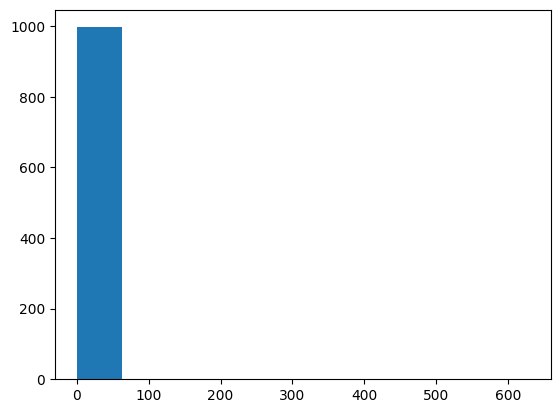

In [97]:
g = nx.scale_free_graph(NODES, alpha=0.28, beta=0.7, gamma=0.02)
g = nx.Graph(g)
print(f"g has {len(g.nodes)} nodes and {len(g.edges)} edges!")
plt.hist([nx.degree(g, n) for n in g.nodes])

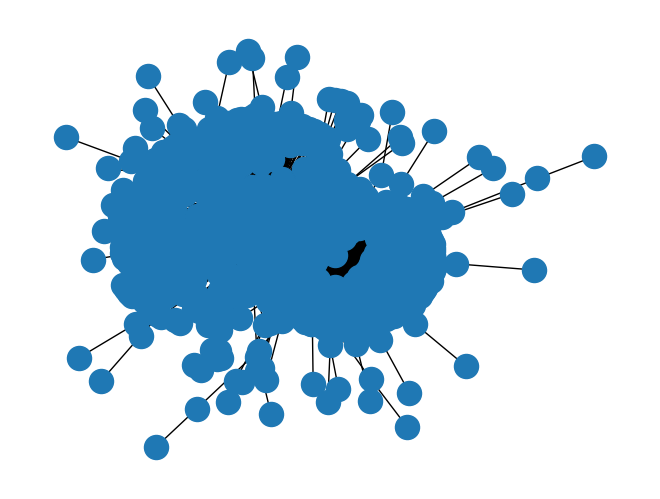

In [99]:
nx.draw(g)

g has 1000 nodes and 2352 edges!


(array([165., 166., 159., 154., 161.,  90.,  52.,  32.,  13.,   8.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

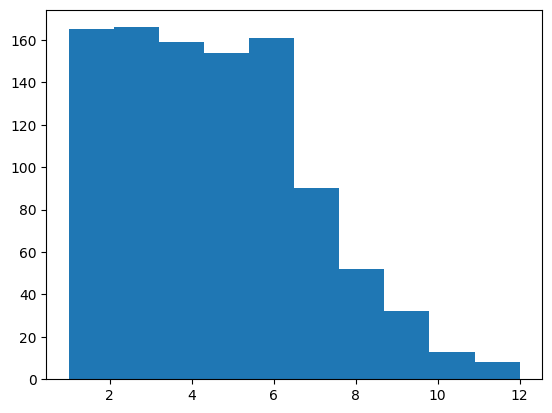

In [86]:
max_edges = NODES * (NODES - 1)
target_edges = 2345

p = (2345 / max_edges) * 2

while 1:
    g = nx.erdos_renyi_graph(NODES + 10, p)
    components = list(nx.connected_components(g))
    if len(components) != 1:
        largest_component = sorted(zip(components, map(lambda x: len(x), components)))[0][0]
        g = nx.induced_subgraph(g, largest_component)
    
    if len(g.nodes) == NODES:
        if target_edges * 0.99 <= len(g.edges) <= target_edges * 1.01:
            break
print(f"g has {len(g.nodes)} nodes and {len(g.edges)} edges!")
plt.hist([nx.degree(g, n) for n in g.nodes])

g has 1000 nodes and 1996 edges!


(array([928.,  46.,  14.,   2.,   5.,   1.,   2.,   0.,   1.,   1.]),
 array([ 2. ,  8.2, 14.4, 20.6, 26.8, 33. , 39.2, 45.4, 51.6, 57.8, 64. ]),
 <BarContainer object of 10 artists>)

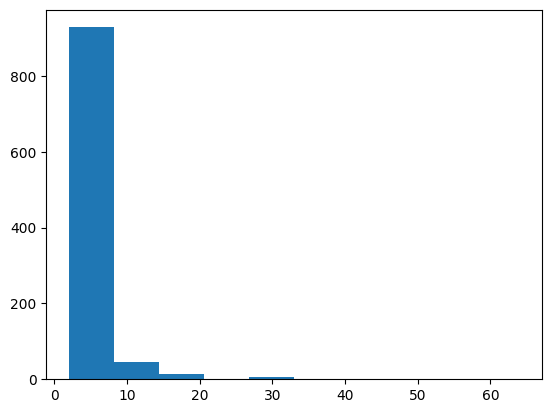

In [96]:
g = nx.barabasi_albert_graph(NODES, m=2)
print(f"g has {len(g.nodes)} nodes and {len(g.edges)} edges!")
plt.hist([nx.degree(g, n) for n in g.nodes])